In [ ]:
dataset = "https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset"

# Read the readme.md 

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [3]:
# Preparing our training and validation data for the model training.

data_dir = './Training'
batch_size = 32
img_size = (64, 64)  
validation_split = 0.2  

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_dataset.class_names
print(f"Sınıflar: {class_names}")

Found 47009 files belonging to 2 classes.
Using 37608 files for training.
Found 47009 files belonging to 2 classes.
Using 9401 files for validation.
Sınıflar: ['female', 'male']


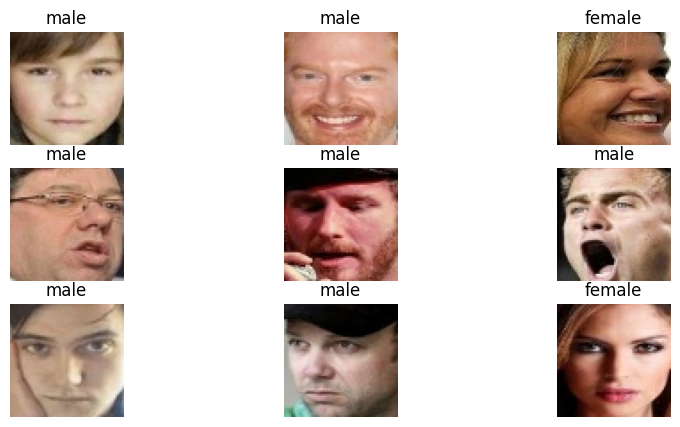

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for images, labels in train_dataset.take(1): # Choosed the batch which we take.
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [5]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 2, 2, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 128)               655488    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 4,705,317
Trainable params: 4,663,294
Non-trainable params: 42,023
_________________________________________________________________


In [6]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs=10)

Epoch 1/10
1176/1176 [==============================] - 83s 61ms/step - loss: 0.1737 - accuracy: 0.9385 - val_loss: 0.1224 - val_accuracy: 0.9598
Epoch 2/10
1176/1176 [==============================] - 71s 60ms/step - loss: 0.0982 - accuracy: 0.9668 - val_loss: 0.1119 - val_accuracy: 0.9598
Epoch 3/10
1176/1176 [==============================] - 72s 61ms/step - loss: 0.0794 - accuracy: 0.9734 - val_loss: 0.1222 - val_accuracy: 0.9636
Epoch 4/10
1176/1176 [==============================] - 75s 63ms/step - loss: 0.0702 - accuracy: 0.9761 - val_loss: 0.1319 - val_accuracy: 0.9638
Epoch 5/10
1176/1176 [==============================] - 74s 63ms/step - loss: 0.1072 - accuracy: 0.9659 - val_loss: 0.6029 - val_accuracy: 0.9332
Epoch 6/10
1176/1176 [==============================] - 75s 63ms/step - loss: 0.0890 - accuracy: 0.9707 - val_loss: 0.1114 - val_accuracy: 0.9617
Epoch 7/10
1176/1176 [==============================] - 75s 64ms/step - loss: 0.0575 - accuracy: 0.9806 - val_loss: 0.1524 -

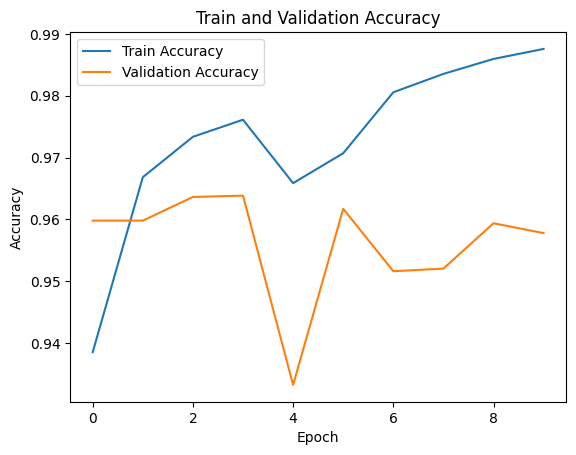

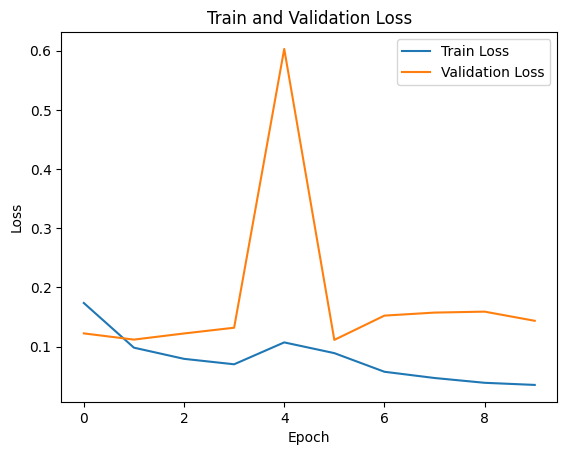

In [7]:
# Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Saving the model.
model.save("Gender_Classifier.h5")

In [9]:
import tensorflow as tf
import numpy as np

# Preparing the test data.
test_dir = './Validation'
batch_size = 32
img_size = (64, 64) 

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int' )


# Saving true labels and predicted labels.
y_true = []
y_pred = []

for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

Found 11649 files belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


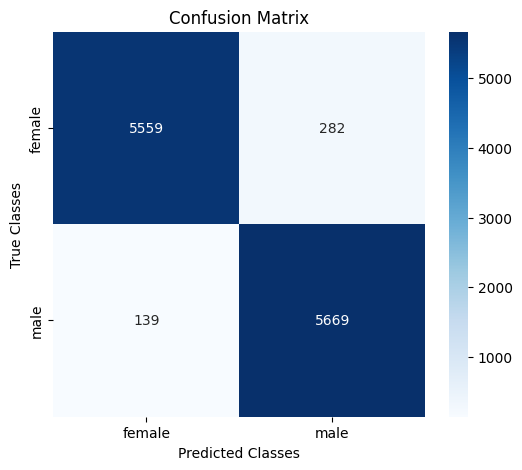

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report


# Creating confusion matrix.
cm = confusion_matrix(y_true, y_pred)


# Visualizing confusion matrix.
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_names, yticklabels=test_dataset.class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


In [11]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_dataset.class_names))


Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.95      0.96      5841
        male       0.95      0.98      0.96      5808

    accuracy                           0.96     11649
   macro avg       0.96      0.96      0.96     11649
weighted avg       0.96      0.96      0.96     11649

